In [2]:
#Import all required libraries as below

import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import Skyserver data files using pandas

df=pd.read_excel("F:/Pranjali/Data Science/Eval Project/Data Files/covid19_Brazil.xlsx")

In [4]:
df.head()

,PatientID,Patientagequantile,SARSCov2examresult,"Patientaddmitedtoregularward(1=yes,0=no)","Patientaddmitedtosemiintensiveunit(1=yes,0=no)","Patientaddmitedtointensivecareunit(1=yes,0=no)",Hematocrit,Hemoglobin,Platelets,Meanplateletvolume,...,Hbsaturation(arterialbloodgases),pCO2(arterialbloodgasanalysis),Baseexcess(arterialbloodgasanalysis),pH(arterialbloodgasanalysis),TotalCO2(arterialbloodgasanalysis),HCO3(arterialbloodgasanalysis),pO2(arterialbloodgasanalysis),ArteiralFio2,Phosphor,ctO2(arterialbloodgasanalysis)
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,0.02234,0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.head(1)

,PatientID,Patientagequantile,SARSCov2examresult,"Patientaddmitedtoregularward(1=yes,0=no)","Patientaddmitedtosemiintensiveunit(1=yes,0=no)","Patientaddmitedtointensivecareunit(1=yes,0=no)",Hematocrit,Hemoglobin,Platelets,Meanplateletvolume,...,Hbsaturation(arterialbloodgases),pCO2(arterialbloodgasanalysis),Baseexcess(arterialbloodgasanalysis),pH(arterialbloodgasanalysis),TotalCO2(arterialbloodgasanalysis),HCO3(arterialbloodgasanalysis),pO2(arterialbloodgasanalysis),ArteiralFio2,Phosphor,ctO2(arterialbloodgasanalysis)
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, PatientID to ctO2(arterialbloodgasanalysis)
dtypes: float64(105), int64(5), object(1)
memory usage: 4.8+ MB


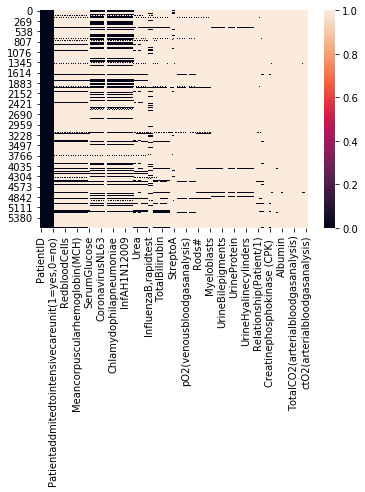

In [7]:
# check missing values
sns.heatmap(df.isnull())

In [8]:
list(df.columns.values) 

['PatientID',
 'Patientagequantile',
 'SARSCov2examresult',
 'Patientaddmitedtoregularward(1=yes,0=no)',
 'Patientaddmitedtosemiintensiveunit(1=yes,0=no)',
 'Patientaddmitedtointensivecareunit(1=yes,0=no)',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Meanplateletvolume',
 'RedbloodCells',
 'Lymphocytes',
 'Meancorpuscularhemoglobinconcentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Meancorpuscularhemoglobin(MCH)',
 'Eosinophils',
 'Meancorpuscularvolume(MCV)',
 'Monocytes',
 'Redbloodcelldistributionwidth(RDW)',
 'SerumGlucose',
 'RespiratorySyncytialVirus',
 'InfluenzaA',
 'InfluenzaB',
 'Parainfluenza1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Mycoplasmapneumoniae',
 'CoronavirusHKU1',
 'Parainfluenza3',
 'Chlamydophilapneumoniae',
 'Adenovirus',
 'Parainfluenza4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'InfAH1N12009',
 'Bordetellapertussis',
 'Metapneumovirus',
 'Parainfluenza2',
 'Neutrophils',
 'Urea',
 'ProteinaCreativamg/dL',
 'Creatinine',
 'Potassium',
 'Sodi

In [9]:
cols=('PatientID',
 'Patientagequantile',
 'SARSCov2examresult',
 'Patientaddmitedtoregularward(1=yes,0=no)',
 'Patientaddmitedtosemiintensiveunit(1=yes,0=no)',
 'Patientaddmitedtointensivecareunit(1=yes,0=no)',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Meanplateletvolume',
 'RedbloodCells',
 'Lymphocytes',
 'Meancorpuscularhemoglobinconcentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Meancorpuscularhemoglobin(MCH)',
 'Eosinophils',
 'Meancorpuscularvolume(MCV)',
 'Monocytes',
 'Redbloodcelldistributionwidth(RDW)',
 'SerumGlucose',
 'RespiratorySyncytialVirus',
 'InfluenzaA',
 'InfluenzaB',
 'Parainfluenza1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Mycoplasmapneumoniae',
 'CoronavirusHKU1',
 'Parainfluenza3',
 'Chlamydophilapneumoniae',
 'Adenovirus',
 'Parainfluenza4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'InfAH1N12009',
 'Bordetellapertussis',
 'Metapneumovirus',
 'Parainfluenza2',
 'Neutrophils',
 'Urea',
 'ProteinaCreativamg/dL',
 'Creatinine',
 'Potassium',
 'Sodium',
 'InfluenzaB,rapidtest',
 'InfluenzaA,rapidtest',
 'Alaninetransaminase',
 'Aspartatetransaminase',
 'Gammaglutamyltransferase\xa0',
 'TotalBilirubin',
 'DirectBilirubin',
 'IndirectBilirubin',
 'Alkalinephosphatase',
 'Ionizedcalcium\xa0',
 'StreptoA',
 'Magnesium',
 'pCO2(venousbloodgasanalysis)',
 'Hbsaturation(venousbloodgasanalysis)',
 'Baseexcess(venousbloodgasanalysis)',
 'pO2(venousbloodgasanalysis)',
 'Fio2(venousbloodgasanalysis)',
 'TotalCO2(venousbloodgasanalysis)',
 'pH(venousbloodgasanalysis)',
 'HCO3(venousbloodgasanalysis)',
 'Rods#',
 'Segmented',
 'Promyelocytes',
 'Metamyelocytes',
 'Myelocytes',
 'Myeloblasts',
 'UrineEsterase',
 'UrineAspect',
 'UrinepH',
 'UrineHemoglobin',
 'UrineBilepigments',
 'UrineKetoneBodies',
 'UrineNitrite',
 'UrineDensity',
 'UrineUrobilinogen',
 'UrineProtein',
 'UrineSugar',
 'UrineLeukocytes',
 'UrineCrystals',
 'UrineRedbloodcells',
 'UrineHyalinecylinders',
 'UrineGranularcylinders',
 'UrineYeasts',
 'UrineColor',
 'Partialthromboplastintime\xa0(PTT)\xa0',
 'Relationship(Patient/Normal)',
 'Internationalnormalizedratio(INR)',
 'LacticDehydrogenase',
 'Prothrombintime(PT),Activity',
 'VitaminB12',
 'Creatinephosphokinase\xa0(CPK)\xa0',
 'Ferritin',
 'ArterialLacticAcid',
 'Lipasedosage',
 'DDimer',
 'Albumin',
 'Hbsaturation(arterialbloodgases)',
 'pCO2(arterialbloodgasanalysis)',
 'Baseexcess(arterialbloodgasanalysis)',
 'pH(arterialbloodgasanalysis)',
 'TotalCO2(arterialbloodgasanalysis)',
 'HCO3(arterialbloodgasanalysis)',
 'pO2(arterialbloodgasanalysis)',
 'ArteiralFio2',
 'Phosphor',
 'ctO2(arterialbloodgasanalysis)')

In [10]:
 def replace_vals(row):
        for col in cols:
               if row[col] == 'NaN':
                    row[col] = 1
                     

In [11]:
df.head()

,PatientID,Patientagequantile,SARSCov2examresult,"Patientaddmitedtoregularward(1=yes,0=no)","Patientaddmitedtosemiintensiveunit(1=yes,0=no)","Patientaddmitedtointensivecareunit(1=yes,0=no)",Hematocrit,Hemoglobin,Platelets,Meanplateletvolume,...,Hbsaturation(arterialbloodgases),pCO2(arterialbloodgasanalysis),Baseexcess(arterialbloodgasanalysis),pH(arterialbloodgasanalysis),TotalCO2(arterialbloodgasanalysis),HCO3(arterialbloodgasanalysis),pO2(arterialbloodgasanalysis),ArteiralFio2,Phosphor,ctO2(arterialbloodgasanalysis)
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,0.02234,0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
L1=list(df.columns.values)
print(L1)

['PatientID', 'Patientagequantile', 'SARSCov2examresult', 'Patientaddmitedtoregularward(1=yes,0=no)', 'Patientaddmitedtosemiintensiveunit(1=yes,0=no)', 'Patientaddmitedtointensivecareunit(1=yes,0=no)', 'Hematocrit', 'Hemoglobin', 'Platelets', 'Meanplateletvolume', 'RedbloodCells', 'Lymphocytes', 'Meancorpuscularhemoglobinconcentration\xa0(MCHC)', 'Leukocytes', 'Basophils', 'Meancorpuscularhemoglobin(MCH)', 'Eosinophils', 'Meancorpuscularvolume(MCV)', 'Monocytes', 'Redbloodcelldistributionwidth(RDW)', 'SerumGlucose', 'RespiratorySyncytialVirus', 'InfluenzaA', 'InfluenzaB', 'Parainfluenza1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Mycoplasmapneumoniae', 'CoronavirusHKU1', 'Parainfluenza3', 'Chlamydophilapneumoniae', 'Adenovirus', 'Parainfluenza4', 'Coronavirus229E', 'CoronavirusOC43', 'InfAH1N12009', 'Bordetellapertussis', 'Metapneumovirus', 'Parainfluenza2', 'Neutrophils', 'Urea', 'ProteinaCreativamg/dL', 'Creatinine', 'Potassium', 'Sodium', 'InfluenzaB,rapidtest', 'InfluenzaA,rap

In [13]:
# Use for loop to convert all data types into interger data types for all columns

from sklearn.preprocessing import LabelEncoder
label_encoders = LabelEncoder()

label_encoders = {}
categorical_columns = ['SARSCov2examresult','Hemoglobin','Leukocytes','Redbloodcelldistributionwidth(RDW)','ProteinaCreativamg/dL','InfluenzaB,rapidtest','InfluenzaA,rapidtest','TotalBilirubin','DirectBilirubin','IndirectBilirubin','StreptoA','Magnesium','pH(venousbloodgasanalysis)','UrineEsterase','UrineAspect','UrinepH','UrineHemoglobin','UrineBilepigments','UrineKetoneBodies','UrineNitrite','UrineDensity','UrineUrobilinogen','UrineProtein','UrineSugar','UrineLeukocytes','UrineCrystals','UrineRedbloodcells','UrineHyalinecylinders','UrineGranularcylinders','UrineYeasts','UrineColor','Phosphor']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])  # if numpy instead of pandas use X[:, column] instead

In [14]:
features = df.columns.values

In [15]:
from sklearn.preprocessing import StandardScaler
x = df.loc[:, features].values
# x = StandardScaler().fit_transform(x) # normalizing the features

In [16]:
# Preparing x & y as per no of correlated columns 

import pandas as pd

x = df[['Hemoglobin',
 'Leukocytes',
 'Redbloodcelldistributionwidth(RDW)',
 'ProteinaCreativamg/dL',
 'InfluenzaB,rapidtest',
 'InfluenzaA,rapidtest',
 'TotalBilirubin',
 'DirectBilirubin',
 'IndirectBilirubin',
 'StreptoA',
 'Magnesium',
 'pH(venousbloodgasanalysis)',
 'UrineEsterase',
 'UrineAspect',
 'UrinepH',
 'UrineHemoglobin',
 'UrineBilepigments',
 'UrineKetoneBodies',
 'UrineNitrite',
 'UrineDensity',
 'UrineUrobilinogen',
 'UrineProtein',
 'UrineSugar',
 'UrineLeukocytes',
 'UrineCrystals',
 'UrineRedbloodcells',
 'UrineHyalinecylinders',
 'UrineGranularcylinders',
 'UrineYeasts',
 'UrineColor',
 'Phosphor']]

y = df.SARSCov2examresult        # y is a vector, hence we use dot to access 'label'


In [17]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(5644, 31)


In [18]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(5644,)


In [19]:
x.shape

(5644, 31)

In [20]:
import numpy as np
np.mean(x),np.std(x)

(Hemoglobin                            2328.343019
 Leukocytes                            2699.846208
 Redbloodcelldistributionwidth(RDW)    2307.613572
 ProteinaCreativamg/dL                 2592.265060
 InfluenzaB,rapidtest                  2062.858434
 InfluenzaA,rapidtest                  2062.858965
 TotalBilirubin                        2660.959072
 DirectBilirubin                       2652.177534
 IndirectBilirubin                     2652.194543
 StreptoA                              2501.182495
 Magnesium                             2790.598866
 pH(venousbloodgasanalysis)            2774.930014
 UrineEsterase                         2762.813607
 UrineAspect                           2755.904855
 UrinepH                               2759.865521
 UrineHemoglobin                       2753.918320
 UrineBilepigments                     2752.927888
 UrineKetoneBodies                     2765.782778
 UrineNitrite                          2821.500000
 UrineDensity                  

In [21]:
Applying Principle component Analysis as no of columns in dataset are more than 100

from sklearn.decomposition import PCA
pca_df = PCA(n_components=2)
# principalComponents_df = pca_df.fit_transform(x)

In [22]:
principal_Df = pd.DataFrame(data = df , columns = ['principalcomponent1', 'principalcomponent2'])

In [23]:
principal_Df.tail()

,principalcomponent1,principalcomponent2
5639,NaN,NaN
5640,NaN,NaN
5641,NaN,NaN
5642,NaN,NaN
5643,NaN,NaN


In [24]:
# replace NaN values
import numpy as np

principal_Df['principalcomponent1'].replace(np.NaN , principal_Df['principalcomponent1'].mean,inplace=True)
principal_Df['principalcomponent2'].replace(np.NaN , principal_Df['principalcomponent2'].mean,inplace=True)

In [25]:
targets=df['SARSCov2examresult']

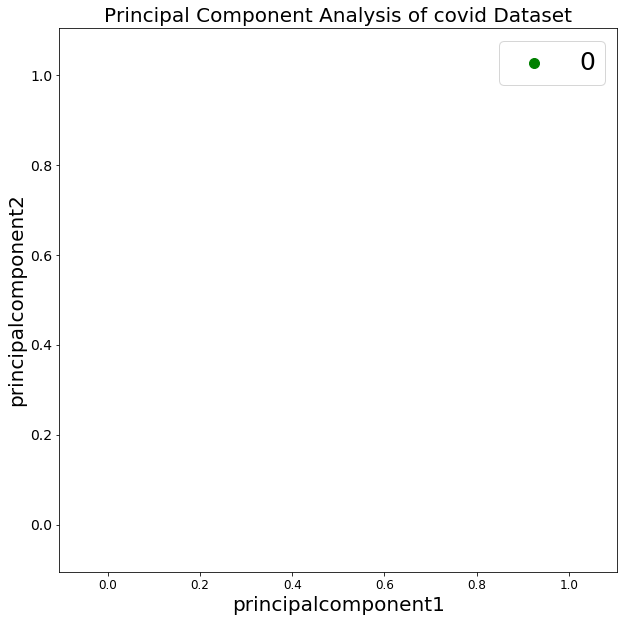

In [27]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('principalcomponent1',fontsize=20)
plt.ylabel('principalcomponent2',fontsize=20)
plt.title("Principal Component Analysis of covid Dataset",fontsize=20)
targets = ['1', '0']
colors = ['g', 'r']
for targets, color in zip(targets,colors):
    indicesToKeep = df['SARSCov2examresult'] == targets
    plt.scatter(principal_Df.loc[indicesToKeep, 'principalcomponent1']
               , principal_Df.loc[indicesToKeep, 'principalcomponent2'], c = color, s = 100)

plt.legend(targets,prop={'size': 25})

In [28]:
# class distribution of target 
print(df.groupby('SARSCov2examresult').size())

SARSCov2examresult
0    5086
1     558
dtype: int64


Covid19 positive cases are 9% & negative cases are 91%.

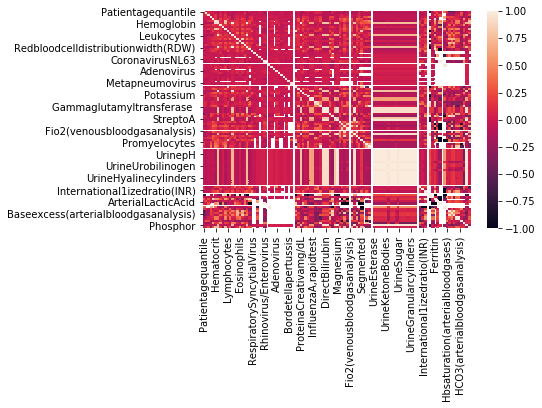

In [29]:
# checking correlation using heatmap
dfcor=df.corr()
sns.heatmap(dfcor)

In [30]:
import pandas as pd

x = df[['Hemoglobin','Leukocytes','Redbloodcelldistributionwidth(RDW)','ProteinaCreativamg/dL','InfluenzaB,rapidtest','InfluenzaA,rapidtest','TotalBilirubin','DirectBilirubin','IndirectBilirubin','StreptoA','Magnesium','pH(venousbloodgasanalysis)','UrineEsterase','UrineAspect','UrinepH','UrineHemoglobin','UrineBilepigments','UrineKetoneBodies','UrineNitrite','UrineDensity','UrineUrobilinogen','UrineProtein','UrineSugar','UrineLeukocytes','UrineCrystals','UrineRedbloodcells','UrineHyalinecylinders','UrineGranularcylinders','UrineYeasts','UrineColor','Phosphor']]
    
y = df.SARSCov2examresult

In [31]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=45, test_size=0.30)

# default split is 75% for training and 25% for testing
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3950, 31)
(1694, 31)
(3950,)
(1694,)


In [32]:
np.min(x_train),np.max(x_train)

(Hemoglobin                            0
 Leukocytes                            0
 Redbloodcelldistributionwidth(RDW)    0
 ProteinaCreativamg/dL                 0
 InfluenzaB,rapidtest                  0
 InfluenzaA,rapidtest                  0
 TotalBilirubin                        0
 DirectBilirubin                       0
 IndirectBilirubin                     0
 StreptoA                              0
 Magnesium                             0
 pH(venousbloodgasanalysis)            0
 UrineEsterase                         0
 UrineAspect                           0
 UrinepH                               0
 UrineHemoglobin                       0
 UrineBilepigments                     0
 UrineKetoneBodies                     0
 UrineNitrite                          0
 UrineDensity                          0
 UrineUrobilinogen                     0
 UrineProtein                          0
 UrineSugar                            0
 UrineLeukocytes                       0
 UrineCrystals  

In [33]:
np.min(y_train),np.max(y_train)

(0, 1)

# Apply Classification algorithm as target values are categorical in to positive(0) & negative(0)
Train/Test this dataset for all possible classificxation algorithms 

In [34]:
# k=10
dtc=KNeighborsClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8813459268004723
[[1468   50]
 [ 151   25]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1518
           1       0.33      0.14      0.20       176

    accuracy                           0.88      1694
   macro avg       0.62      0.55      0.57      1694
weighted avg       0.85      0.88      0.86      1694



In [35]:
# Load libraries

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [36]:
# Grid Search for Algorithm Tuning

import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# load the diabetes datasets
dataset = df

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(x_train, y_train)    
print(grid)

# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.008000121975741892
1.0


In [37]:
# Randomized Search for Algorithm Tuning

import numpy as np
from scipy.stats import uniform as sp_rand
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# load the diabetes datasets
dataset = df

# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}

# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(x_train, y_train) 
print(rsearch)

# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002510BA15588>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.008000051413368191
0.9875271625284501


In [38]:
# Spot Check Algorithms

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:    
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.900253 (0.002025)
LDA: 0.897468 (0.005095)
KNN: 0.894177 (0.008608)
CART: 0.840506 (0.016524)
NB: 0.556709 (0.026466)
SVM: 0.903291 (0.001013)


In [39]:
# Import required libraries 

import seaborn as sb
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# From sklearn matrics import accuracy_score,confusion_matrix,classification_reports
# Cross validation Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [40]:
# scoring parameters for classification
# scoring =[accuracy,f1,f1_micro,f1_macro,roc_auc]
# scoring =[r2,neg_mean_squared_error,explained_variance]

sv=SVC()
score=cross_val_score(sv,x,y,cv=20,scoring='accuracy')
print('accuracy score=',score)
print ('mean scores',score.mean)
print('std',score.std())
y_pred = cross_val_predict(sv,x,y,cv=20)

print('Y prediction values')
print(y_pred)

conf_mat = confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy score= [0.90106007 0.90106007 0.90106007 0.90106007 0.90425532 0.90425532
 0.90070922 0.90070922 0.90070922 0.90070922 0.90070922 0.90070922
 0.90070922 0.90070922 0.90070922 0.90070922 0.90070922 0.90070922
 0.90070922 0.90070922]
mean scores <built-in method mean of numpy.ndarray object at 0x000002510D676DF0>
std 0.0010496014244994066
Y prediction values
[0 0 0 ... 0 0 0]


0.9011339475549256

In [41]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')

print('accuracy score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(knn, x, y, cv=5)

print('Y prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy score: [0.90079717 0.18246236 0.2081488  0.05757307 0.22960993]
mean score: 0.3157182657093141
stn deviation: 0.2985629687415466
Y prediction values
[0 0 0 ... 1 0 0]
y_pred.shape (5644,)


0.3157335223245925

In [51]:
from sklearn.externals import joblib 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

score=cross_val_score(sv,x,y,cv=5,scoring='accuracy') # Calculate the accuracy and predictions

joblib_file = "joblib_sv.pkl"             # Save to file in the current working directory
joblib.dump(sv, joblib_file)
joblib_sv = joblib.load(joblib_file)      # Load from file

print(score)  

[0.90168291 0.62001771 0.90079717 0.53941541 0.90159574]


Conclusion-COVID19 Brazil dataset gives best accuracy & test score for classification model i.e Support Vector Machine
Test Score - 90%
Accuracy Score - 90%
Number of positive cases in Brazil are only 9% % negative cases are 91 % affected by COVID19. 